In [1]:
# ! pip install -r ../requirements-dev.txt

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
from pathlib import Path
import h3

## Собираем табличку с трейн данными

In [3]:
data_dir = Path("../data")

In [4]:
transactions_df = pd.read_parquet(data_dir / "transactions.parquet").drop_duplicates()

In [5]:
# Размечаем транзакции:
# target=1 снятие наличных
# target=0 транзакции через терминал
target_df = pd.read_parquet(data_dir / "target.parquet").drop_duplicates()
target_df["target"] = 1
transactions_df = pd.merge(transactions_df, target_df, how="left", on = ["h3_09", "customer_id"])
transactions_df["target"] = transactions_df["target"].fillna(0).astype(int)

In [6]:
transactions_df["target"].value_counts().reset_index()

,target,count
0,0,3842086
1,1,308509


In [7]:
# Определяем локации банкоматов и терминалов
used_locations = transactions_df[["h3_09"]].drop_duplicates()
used_locations[['lat', 'lon']] = used_locations['h3_09'].apply(lambda x: pd.Series(h3.h3_to_geo(x)))
transactions_df = pd.merge(transactions_df, used_locations, on = ["h3_09"])

In [8]:
transactions_df

,h3_09,customer_id,datetime_id,count,sum,avg,min,max,std,count_distinct,mcc_code,target,lat,lon
0,8911aa4c62fffff,1,3,1,3346.65,3346.650,3346.65,3346.65,NaN,1,13,0,55.565522,37.445024
1,8911aa4c62fffff,6180,3,2,22591.72,11295.860,9049.13,13542.59,3177.356037,2,13,0,55.565522,37.445024
2,8911aa4c62fffff,9033,3,2,2480.34,1240.170,1205.00,1275.34,49.737891,2,13,0,55.565522,37.445024
3,8911aa4c62fffff,9570,2,11,13706.88,1246.080,79.98,2780.56,799.681502,9,13,0,55.565522,37.445024
4,8911aa4c62fffff,14235,3,5,3211.89,642.378,129.80,1395.24,512.713217,4,13,0,55.565522,37.445024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150590,8911aa4ed8bffff,3478,2,1,4445.00,4445.000,4445.00,4445.00,NaN,1,8,0,55.657850,37.419223
4150591,8911aa0f02fffff,8741,2,1,135.00,135.000,135.00,135.00,NaN,1,6,0,55.956592,37.340281
4150592,8911aa72ad3ffff,91149,2,1,931.00,931.000,931.00,931.00,NaN,1,1,0,55.879372,37.494532
4150593,8911aa78a73ffff,1354,1,1,1880.00,1880.000,1880.00,1880.00,NaN,1,5,0,55.715961,37.703801


## Посмотрим на выбранного клиента

In [9]:
customer_id = 23172
transactions_df[(transactions_df["customer_id"]==customer_id) & (transactions_df["target"]==1)]
# Чел в разные дни снимает в одном и том же банкомате (только однажды решил снять в 8911aa78c93ffff)

,h3_09,customer_id,datetime_id,count,sum,avg,min,max,std,count_distinct,mcc_code,target,lat,lon
2046993,8911aa6ac3bffff,23172,1,1,3197.00,3197.000000,3197.00,3197.00,NaN,1,10,1,55.753226,37.820995
2047550,8911aa6ac3bffff,23172,3,1,750.78,750.780000,750.78,750.78,NaN,1,5,1,55.753226,37.820995
2047744,8911aa6ac3bffff,23172,3,1,600.00,600.000000,600.00,600.00,NaN,1,13,1,55.753226,37.820995
2047847,8911aa6ac3bffff,23172,1,1,49.49,49.490000,49.49,49.49,NaN,1,13,1,55.753226,37.820995
2047899,8911aa6ac3bffff,23172,1,1,260.00,260.000000,260.00,260.00,NaN,1,8,1,55.753226,37.820995
2048473,8911aa6ac3bffff,23172,2,7,4275.38,610.768571,36.99,1969.74,783.187378,4,13,1,55.753226,37.820995
2048919,8911aa6ac3bffff,23172,2,1,520.00,520.000000,520.00,520.00,NaN,1,8,1,55.753226,37.820995
2049287,8911aa6ac3bffff,23172,1,3,1710.00,570.000000,180.00,1090.00,468.721666,2,8,1,55.753226,37.820995
2050069,8911aa6ac3bffff,23172,3,1,708.76,708.760000,708.76,708.76,NaN,1,8,1,55.753226,37.820995
2050434,8911aa6ac3bffff,23172,2,1,907.00,907.000000,907.00,907.00,NaN,1,8,1,55.753226,37.820995


In [10]:
transactions_df[(transactions_df["customer_id"]==customer_id) & (transactions_df["target"]==0)]
# Также у чела много транзакций в разных местах

,h3_09,customer_id,datetime_id,count,sum,avg,min,max,std,count_distinct,mcc_code,target,lat,lon
139637,8911aa7a967ffff,23172,3,15,840.0,56.0,56.0,56.0,0.000000,13,9,0,55.780645,37.633646
153078,8911aa7a967ffff,23172,1,13,728.0,56.0,56.0,56.0,0.000000,12,9,0,55.780645,37.633646
159253,8911aa7a967ffff,23172,2,28,1568.0,56.0,56.0,56.0,0.000000,22,9,0,55.780645,37.633646
490987,8911aa7abd3ffff,23172,3,1,800.0,800.0,800.0,800.0,NaN,1,13,0,55.756868,37.615785
553210,8911aa7abd3ffff,23172,3,1,3237.0,3237.0,3237.0,3237.0,NaN,1,8,0,55.756868,37.615785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591996,891181b68c3ffff,23172,3,1,650.0,650.0,650.0,650.0,NaN,1,11,0,55.617873,37.683738
3681687,8911aa7856fffff,23172,2,2,1170.0,585.0,550.0,620.0,49.497475,1,8,0,55.721607,37.606030
3867136,8911aa72b5bffff,23172,3,1,50.0,50.0,50.0,50.0,NaN,1,8,0,55.891115,37.530820
3867214,8911aa72b5bffff,23172,2,1,500.0,500.0,500.0,500.0,NaN,1,8,0,55.891115,37.530820


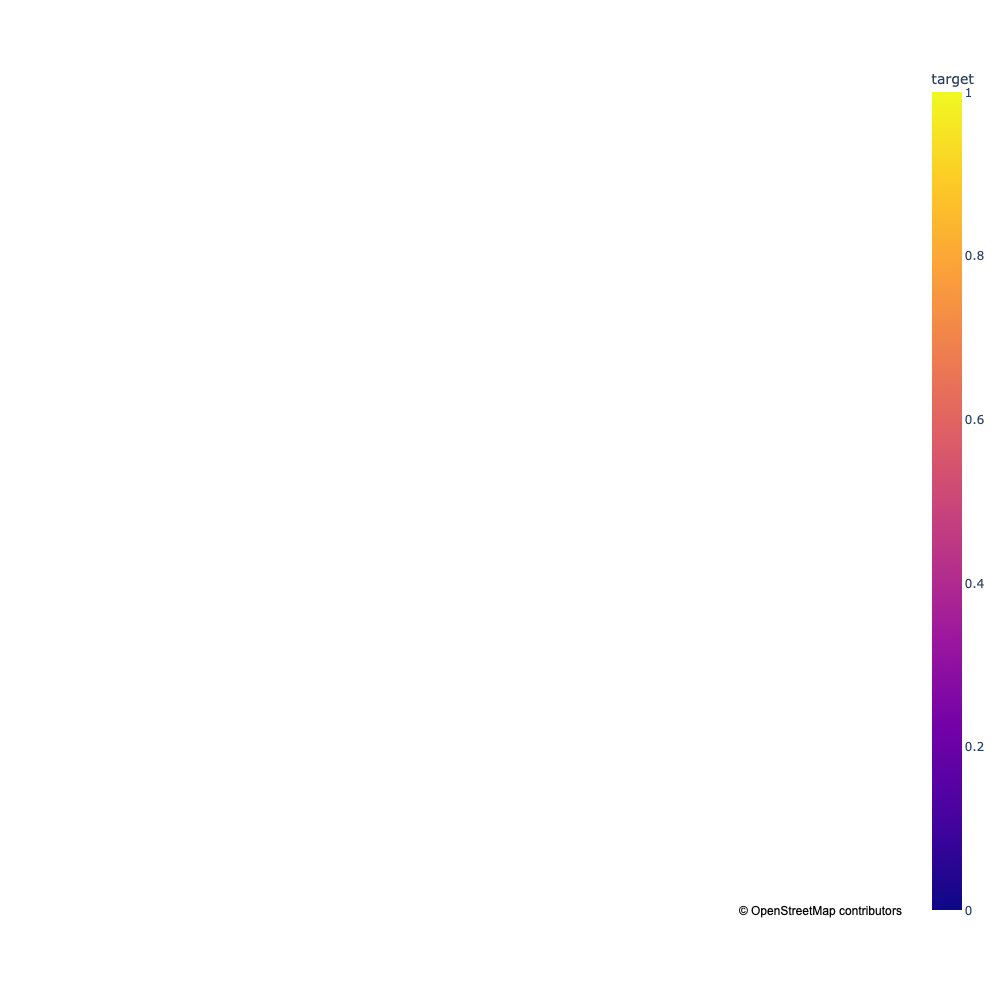

In [22]:
plot_df = transactions_df[(transactions_df["customer_id"]==customer_id)].copy()

# Добавим разброс, чтобы все было видно на карте
plot_df['lat'] += np.random.normal(0, 0.0005, len(plot_df))
plot_df['lon'] += np.random.normal(0, 0.0005, len(plot_df))
color_mapping = {0: 'blue', 1: 'red'}
color_sequence = plot_df['target'].apply(lambda x:color_mapping[x]).values
fig = px.scatter_mapbox(plot_df,
                        lat='lat',
                        lon='lon',
                        zoom=10, hover_data=["datetime_id","sum"],
                        color=plot_df['target'], color_discrete_sequence=color_sequence,
                       mapbox_style="open-street-map",
                       height=1000)
# fig.update_layout(title='Plot of Points', hovermode='closest')
fig.show()

## Еще файлы

In [ ]:
# список всех 1658 геолокаций, где возможно снятие наличности, нужно разметить эти локации в решении
# тут 77 локаций, которых нет в transactions_df.query("target==1").h3_09.unique()
with open(data_dir / "hexses_target.lst", "r") as file:
    file_contents = file.read()
hexses_target = file_contents.split("\n")

In [ ]:
# бесполезный файл, список всех уникальных h3_09 из transactions_df (из всего 8154)
with open(data_dir / "hexses_data.lst", "r") as file:
    file_contents = file.read()
hexses_data = file_contents.split("\n")

In [ ]:
moscow_df = pd.read_parquet(data_dir / "moscow.parquet")

In [ ]:
moscow_df.head()

In [ ]:
for tag in moscow_df[~moscow_df.tags.isna()].tags.iloc[:20]:
    print(tag)

In [ ]:
fig = px.scatter_mapbox(moscow_df.iloc[:10000], lat='lat', lon='lon', hover_name='id', zoom=10, hover_data=["tags"])
fig.update_layout(mapbox_style="open-street-map", height=1000)
fig.update_layout(title='Plot of Points', hovermode='closest')
fig.show()